<a href="https://colab.research.google.com/github/Nasif-RUET/Data-Science-Machine-Learning-Artificial-Intelligence-Projects/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name: KAZI FAHIM AHMAD NASIF
## ID: 201900202007

MNIST classification using ANN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

In [3]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


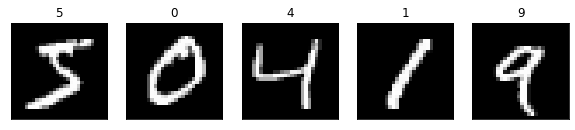

In [5]:
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [6]:
to_categorical(3, num_classes=10)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [9]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


##### The first thing to do is to initialize a sequential model. Afterwards, we are now able to add layers to it. Here I start the Neural Network model with a flatten layer because we need to reshape the 28 by 28 pixels image (2-dimensions) into 784 values (1-dimension). Next, we connect this 784 values into 5 neurons with sigmoid activation function. Actually, you can freely choose any number of neurons for this layer, but since I want to make the Neural Network model to be simple and fast to train so I just go with 5 neurons for this case. The last thing to add is another dense layer (here I use softmax activation function) which acts as our output layer. In the last layer we need to use 10 neurons because our classification task have 10 different classes.

In [11]:
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 3925      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [14]:
model.fit(X_train, y_train, epochs=5, 
          validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5874 - acc: 0.5518 - val_loss: 1.2382 - val_acc: 0.6187
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0767 - acc: 0.6891 - val_loss: 0.9517 - val_acc: 0.7134
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9352 - acc: 0.7154 - val_loss: 0.8862 - val_acc: 0.7357
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8965 - acc: 0.7396 - val_loss: 0.8541 - val_acc: 0.7507
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8649 - acc: 0.7445 - val_loss: 0.8578 - val_acc: 0.7412


##### According to the output above, we can see that the accuracy is increasing (both towards training and test data) in our 5-iteration training process. I think this result is pretty good because only with relatively simple Neural Network model we can obtain approximately 74% of accuracy, even though this result can still be improved.

In [15]:
predictions = model.predict(X_test)
print(predictions)

[[3.7139917e-03 5.6076553e-03 5.1878481e-03 ... 8.5990322e-01
  1.7086853e-03 1.0310396e-01]
 [1.1701260e-02 5.9505362e-02 3.0113447e-01 ... 1.5446870e-03
  7.3700175e-02 1.4908558e-03]
 [1.8625557e-05 8.3276290e-01 3.5416503e-02 ... 2.2839712e-02
  2.6381835e-02 4.2481110e-03]
 ...
 [7.0943371e-03 7.4205062e-05 4.3137325e-03 ... 8.7276567e-03
  4.1861787e-02 2.5804403e-01]
 [1.4023607e-03 1.8313691e-03 8.9894701e-03 ... 6.7773879e-05
  1.4971453e-01 2.5232688e-03]
 [5.8973219e-02 6.8710308e-04 1.3851605e-01 ... 2.1357939e-03
  8.4573254e-03 1.4282044e-03]]


In [16]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 ... 4 5 6]


Lastly, using the code below we can try to print some images along with its predictions:

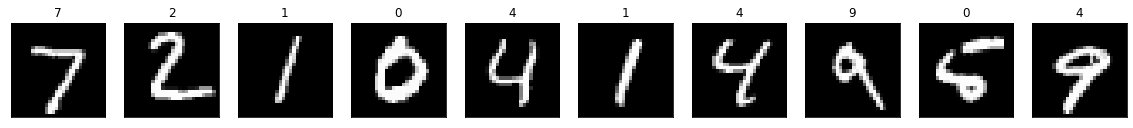

In [17]:
fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

The output image above shows the first 10 test images along with its predictions above each those digit images. You can see there that most of those handwritings are classified correctly. Only the 9th and 10th picture (from the left) are the misclassified.

MNIST classification using CNN

In [18]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


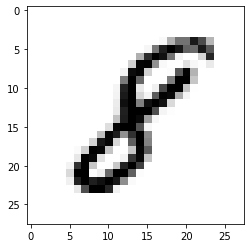

In [20]:
import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [23]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [24]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2081 - accuracy: 0.9369
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0847 - accuracy: 0.9740
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0579 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0443 - accuracy: 0.9853
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0356 - accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0301 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0260 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0209 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0190 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 32s 17m

We achieved 99.4% accuracy with our CNN model.

9


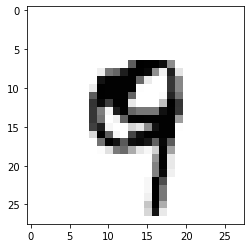

In [25]:
# make individual predictions with the following code:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

Although it is not really a good handwriting of the number 9, our model was able to classify it as 9.

Our CNN model gives better accuracy than ANN model because there is no neuron or weights in CNN. CNN casts multiple layers on images and uses filtration to analyze image inputs.These layers are the math layers,Relu or fully connected layers. The purpose of these layers is to fully understand pattrenrns that the network can see,process output of the data and provide an n-dimensional vector output. 